In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [7]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [13]:
df_boston = pd.DataFrame(data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [16]:
df_boston['Price']= target

In [19]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

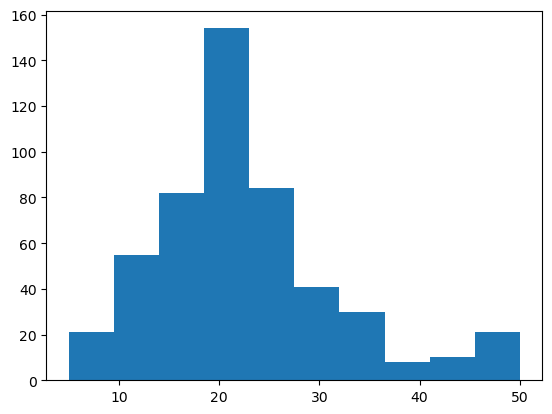

In [20]:
plt.hist(df_boston['Price'])

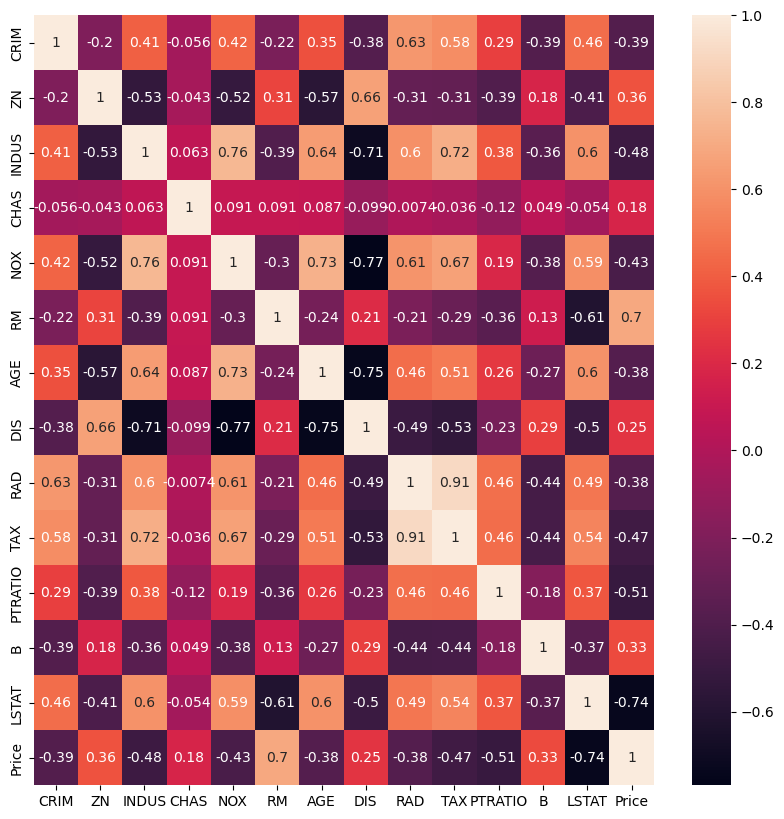

In [24]:
plt.figure(figsize=[10,10])
sns.heatmap(df_boston.corr(),annot=True);

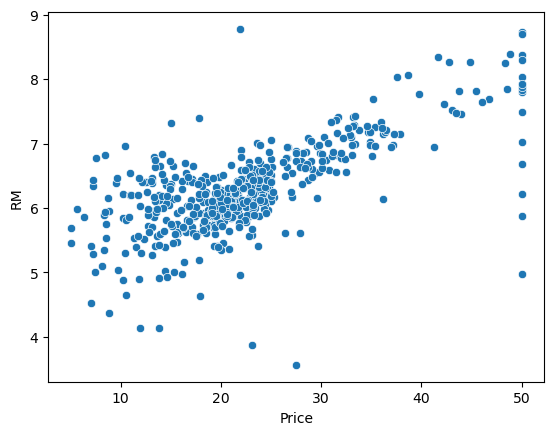

In [26]:
sns.scatterplot(x="Price",y="RM",data=df_boston);

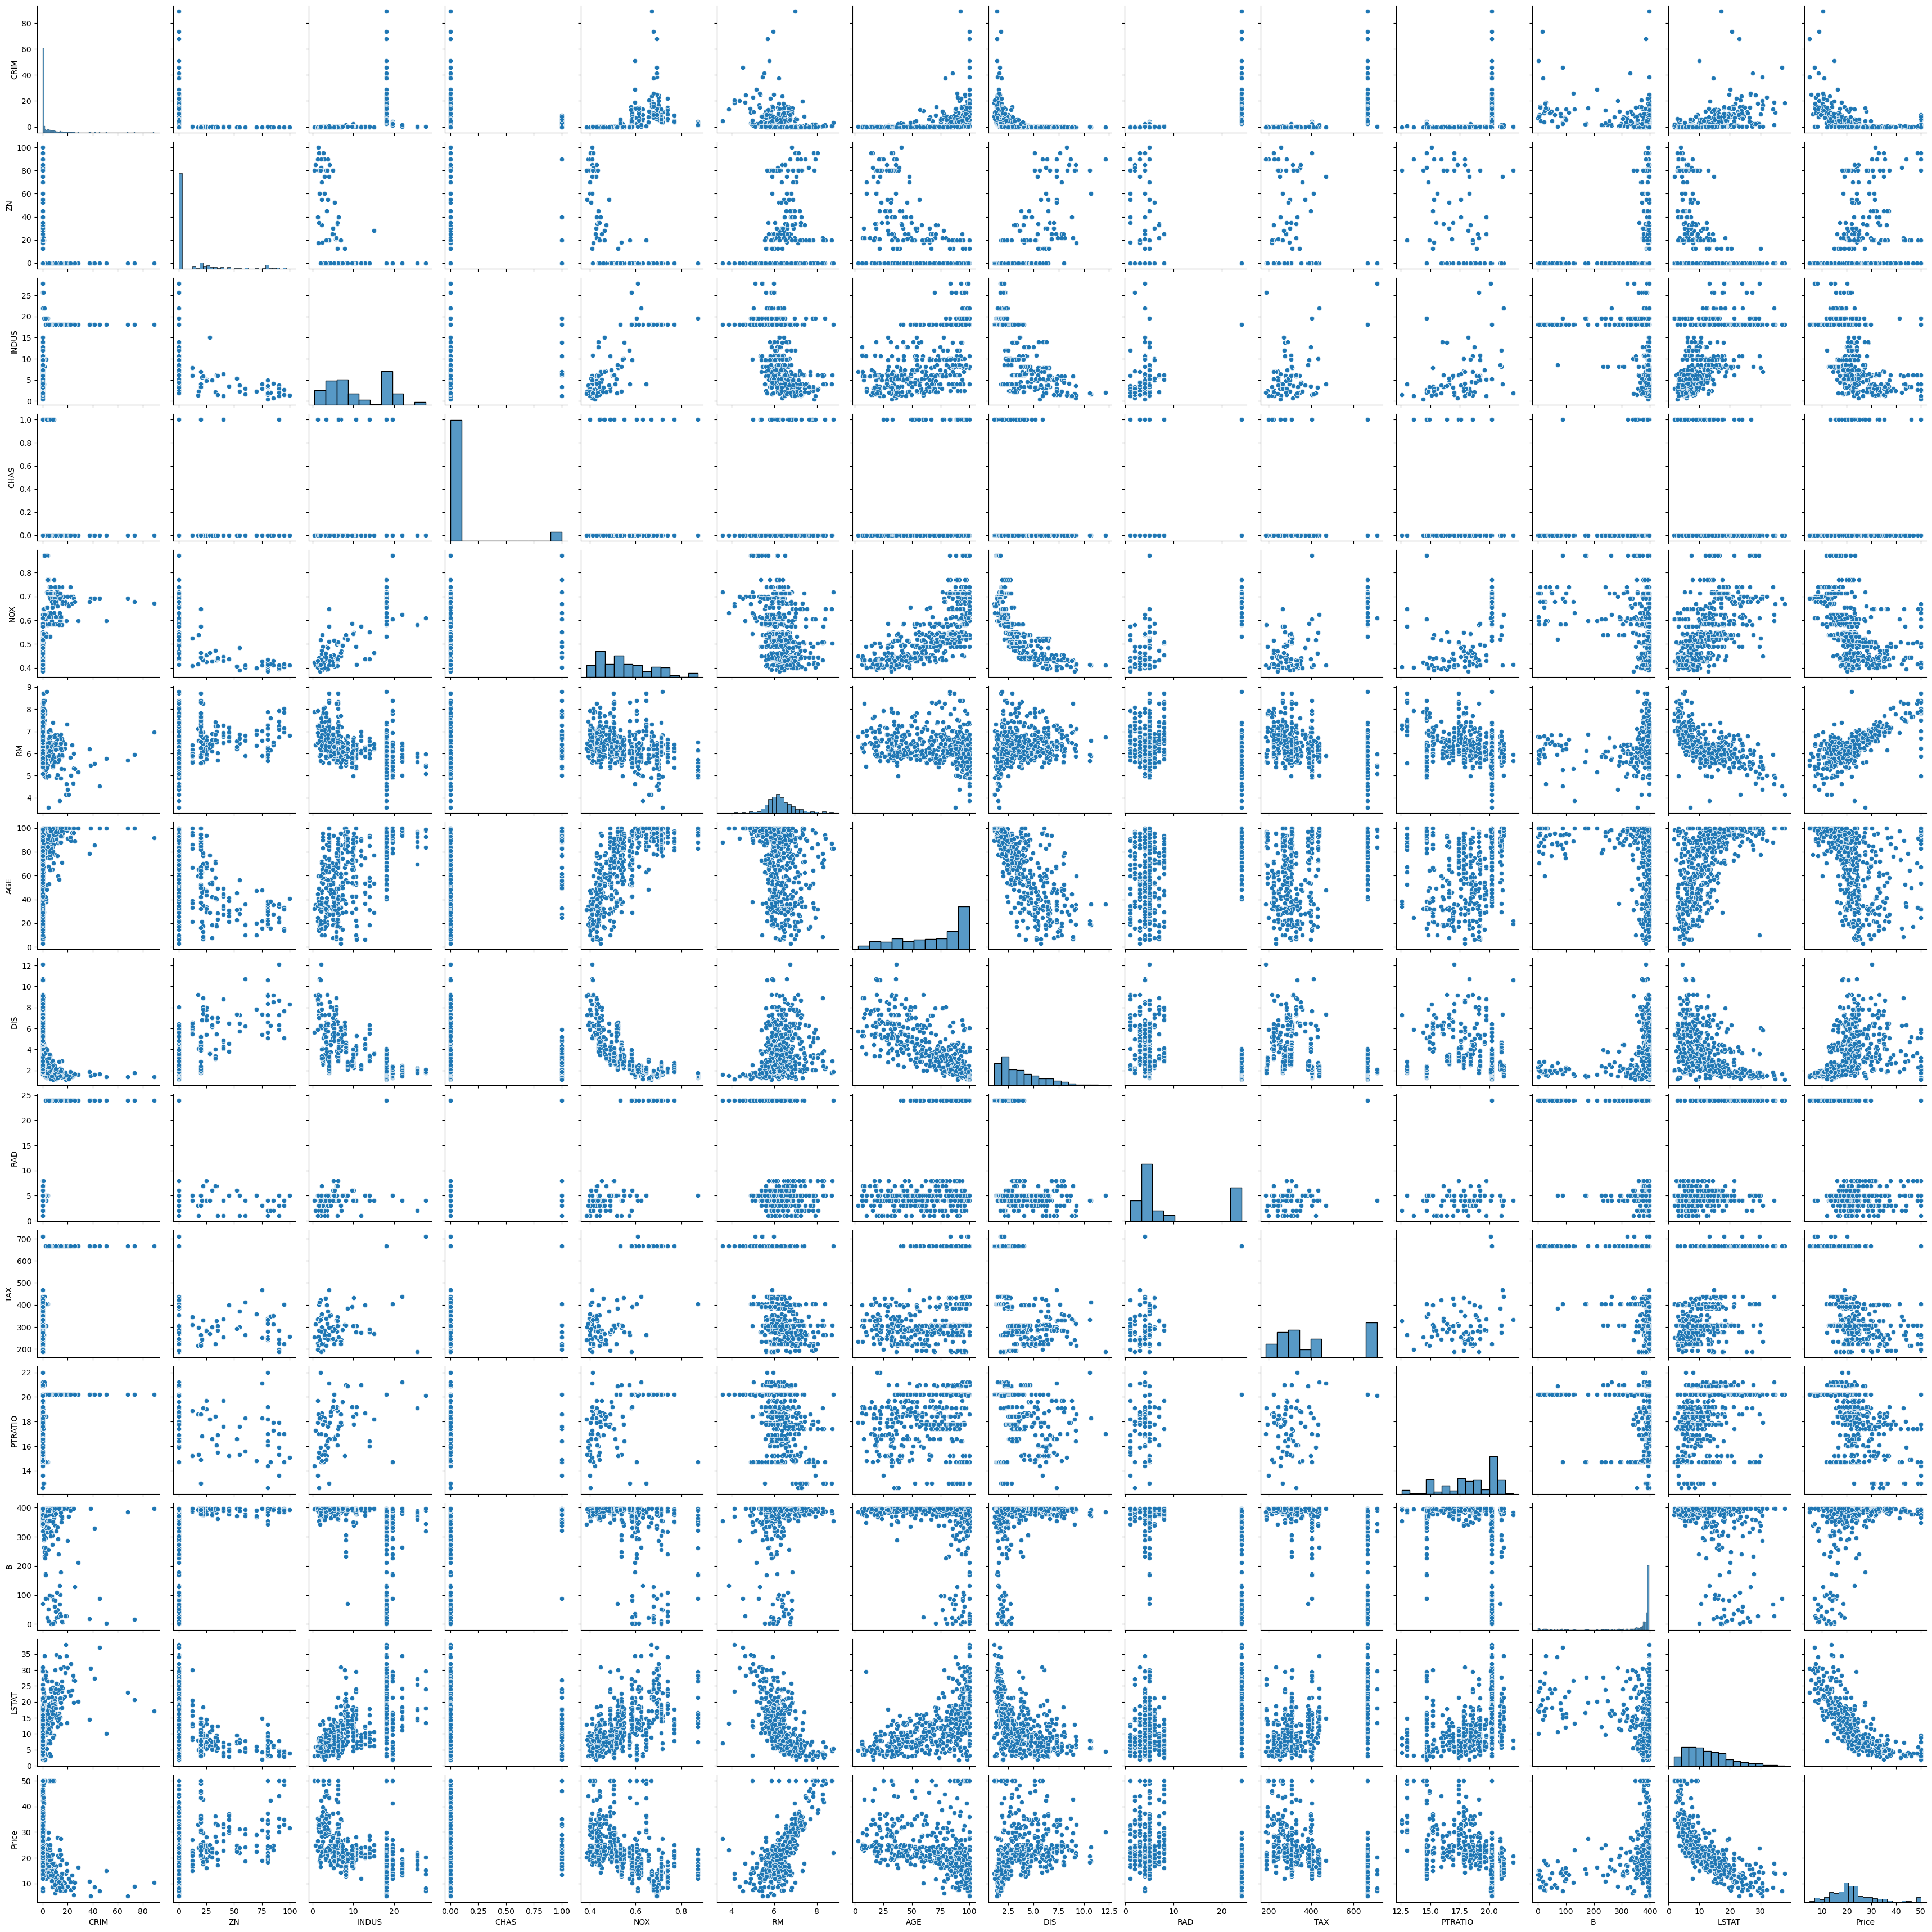

In [28]:
sns.pairplot(df_boston);

In [32]:
x = df_boston.drop("Price",axis=1)
y = df_boston["Price"]

In [34]:
from sklearn.model_selection import train_test_split

In [154]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.15,random_state=23)

In [155]:
df_boston.shape

(506, 14)

In [156]:
x_train.shape

(430, 13)

In [157]:
y_train.shape

(430,)

In [158]:
x_test.shape

(76, 13)

In [159]:
y_test.shape

(76,)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lm = LinearRegression()

In [162]:
lm.fit(x_train,y_train)

LinearRegression()

In [163]:
p = lm.predict(x_test)

In [164]:
p

array([25.50405815, 26.9344672 , 27.22588121, 16.56484762, 38.0538275 ,
       17.02495133, 20.47850426, 28.77026659, 33.98769137, 37.63003319,
       16.19458928, 27.79939005, 25.78764789, 26.3309769 , 21.27156405,
       20.18179726, 30.87036111, 30.74189372, 29.03779066, 28.77412543,
       19.03686529, 17.35526651, 24.73115437, 24.13584205, 13.75584611,
       22.65201018, 32.8657992 , 28.61025183, 28.94921656, 38.13522775,
       18.03787356, 15.88360772, 19.92024163, 20.50132631, 20.23939776,
       37.13802689, 25.34219546, 31.04371216, 13.7123686 , 36.18840111,
        9.10593868, 13.43132508, 11.5560196 , 19.46899014, 35.50548085,
       20.31190521, 13.27291424, 22.07486458, 12.58220956, 39.06690867,
       22.51447851,  3.13067466, 17.4016478 , 18.25156733, 23.80320345,
       32.59747833,  5.37112815, 21.19084099, 17.79850089, 22.05536028,
       18.00519305, 21.61233132, 20.96446346, 42.93455957, 30.58747814,
       29.52215965, 20.38545283, 16.41571688, 31.00459249, 14.25

In [165]:
y_test

176    23.2
311    22.1
94     20.6
139    17.8
232    41.7
       ... 
145    13.8
330    19.8
452    16.1
123    17.3
138    13.3
Name: Price, Length: 76, dtype: float64

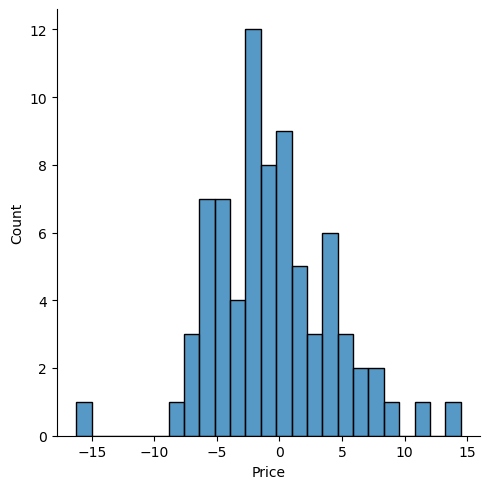

In [166]:
sns.displot((y_test-p),bins=25);

In [167]:
lm.intercept_

np.float64(36.32537362749383)

In [168]:
lm.coef_

array([-1.14635519e-01,  4.96854476e-02,  2.57989452e-02,  3.18588378e+00,
       -1.87049905e+01,  3.74129725e+00,  3.17967931e-03, -1.46693235e+00,
        3.04890971e-01, -1.16154627e-02, -9.06278982e-01,  9.24380465e-03,
       -5.45310285e-01])

In [169]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=["Coeff"]);
cdf

,Coeff
CRIM,-0.114636
ZN,0.049685
INDUS,0.025799
CHAS,3.185884
NOX,-18.704990
RM,3.741297
AGE,0.003180
DIS,-1.466932
RAD,0.304891
TAX,-0.011615


In [170]:
from sklearn import metrics as mt

In [171]:
mt.mean_absolute_error(y_test,p)

3.6843909334507514

In [172]:
mt.mean_squared_error(y_test,p)

23.35707933395031

In [173]:
np.sqrt(mt.mean_squared_error(y_test,p))

np.float64(4.832916234940381)

In [174]:
mt.r2_score(y_test,p)

0.7230647694714062